# Cantilever under compression and bending

In [133]:
# the following is a calculation procedure based on Eurocode 3, Python code is combined with document.
# written by Jiri Mares, 2021
import math
from IPython.display import display, Math, Latex

## Arrangement and Input data

Design a column made of IPE section loaded according to the figure. Column is fixed at it's base in plane x-z and pinned in plane x-y. Column top is restrained in movement in y direction (and free in z direction). Steel grade is S235.

Column is loaded by compressed force 'N' and by horizontal load 'H' in plane x-z. 'N' is permanent loading, 'H' is variable loading. The horizontal deformation at the column top in plane x-z is limited to L / 300.

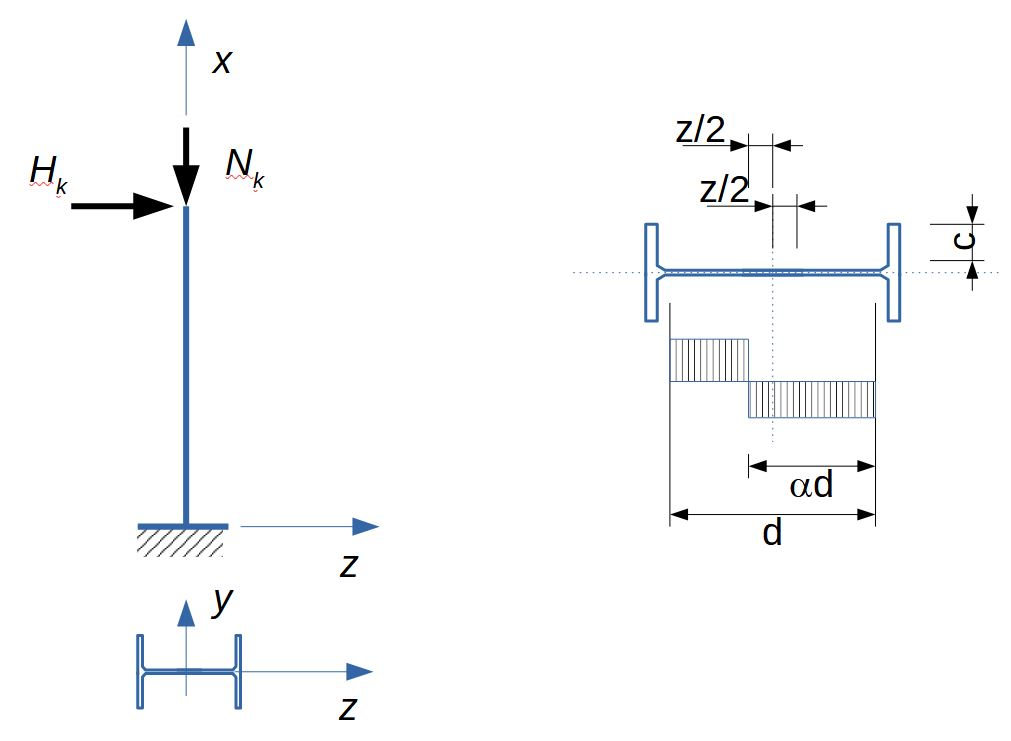

Fig.1 General arrangement and cross sectionclassification

In [134]:
# Length of cantilever [mm]
L = 5000

# Limiting horizontal displacement
delta_max = L / 300

In [135]:
# Material and partial safety factors
E = 210000 #[MPa]
G = 80000 #[MPa]
fy = 235 #[MPa]
fu = 360 #[MPa]
gamma_M0 = 1.15
gamma_M1 = 1.0
gamma_M2 = 1.3
gamma_G = 1.35
gamma_Q = 1.5

In [136]:
# Variable Loading
H_QSk = 0.0 #[kN]
# Permanent Loading
N_GSk = 300 #[kN]

In [137]:
H_QSk = H_QSk * 1000  #[N]
N_GSk = N_GSk * 1000  #[N]
H_Sd = H_QSk * gamma_Q
N_Sd = N_GSk * gamma_G

In [138]:
# Buckling lengths
#L = L / 1000 #units
#E = E * 1000 #units to kilopascals
Ly = L
Lz = 2 * L

In [139]:
# Profiles
# IPE 400
#A = 8446 #[mm^2], cross-sectional area
#Iy = 231300000 #[mm^4]
#Wy = 1157000 #[mm^3]
#Iz = 13180000  #[mm^4]
#It = 510800
#Iw = 490000000000
#zg = 0  #[m]
#zj = 0  #[m]

# IPE 300
A = 5381 #[mm^2], cross-sectional area
Iy = 83560000 #[mm^4]
Wy = 557000 #[mm^3]
Iz = 6038000 #[mm^4]
It = 201200
Iw = 125900000000
zg = 0  #[m]
zj = 0  #[m]

# IPE 270
A = 4594 #[mm], cross-sectional area
Iy = 57900000  #[mm^4]
Wy = 429000  #[mm^3]
Iz = 4199000  #[mm^4]


# IPE 300
A = 5381 #[mm^2], cross-sectional area
Iy = 83560000 #[mm^4]
Wy = 557000 #[mm^3]
Iz = 6038000 #[mm^4]
It = 201200
Iw = 125900000000
zg = 0  #[m]
zj = 0  #[m]
tf = 10.7
tw = 7.1
r = 15 
d = 248.6
bf = 150
depth = 300
c = (bf - tw - r) / 2

# IPE 500
A = 11600 #[mm^2], cross-sectional area
Iy = 482000000 #[mm^4]
Wy = 1930000 #[mm^3]
Wz = 214000
Iz = 21400000 #[mm^4]
It = 896000
Iw = 1250000000000 
zg = 0  #[m]
zj = 0  #[m]
tf = 16
tw = 10.2
r = 21 
d = 426
bf = 200
depth = 500
c = (bf - tw - 2 * r) / 2
iy = math.sqrt(Iy / A)
iz = math.sqrt(Iz / A)

In [140]:
# IPE 500
A = 11600 #[mm^2], cross-sectional area
Iy = 482000000 #[mm^4]
Wy = 1930000 #[mm^3]
Wz = 214000
Iz = 21400000 #[mm^4]
It = 896000
Iw = 1250000000000 
zg = 0  #[m]
zj = 0  #[m]
tf = 16
tw = 10.2
r = 21 
d = 426
bf = 200
depth = 500
c = (bf - tw - 2 * r) / 2
iy = math.sqrt(Iy / A)
iz = math.sqrt(Iz / A)

## Check the deflection

Deflection at the tip of cantilever loaded by transverse force is 

delta = H * L^3 / (3 * E * I)

Knowing the limiting value of the horizontal displacement of the top of the column we can calculate moment of inertia required: 

In [141]:
I = Iy
delta = H_QSk * L**3 / (3 * E * I)

In [142]:
print("delta                      = ", ("%2.2f" % (delta) ), "[mm]")
print("delta_max                  = ", ("%2.2f" % (delta_max) ), "[mm]")

delta                      =  0.00 [mm]
delta_max                  =  16.67 [mm]


In [143]:
print("iy                      = ", ("%2.2f" % (iy) ), "[mm]")
print("iz                      = ", ("%2.2f" % (iz) ), "[mm]")

iy                      =  203.84 [mm]
iz                      =  42.95 [mm]


### Section classification

For parts subject to bending and compression:

Coefficient alpha will be determined on the basis of length of compressed part of the web (see Fig.1):

In [144]:
z = N_Sd / (tw * fy / gamma_M0)
alpha = ((d + z) / 2) / d
epsilon = math.sqrt(235/fy)

In [145]:
print("alpha                   = ", ("%2.2f" % (alpha) ), "[-]")
print("epsilon                 = ", ("%2.2f" % (epsilon) ), "[-]")

alpha                   =  0.73 [-]
epsilon                 =  1.00 [-]


In [146]:
class_web = 0
# for class 1 or (class 3 and 4 ignored)
if(alpha > 0.5):
    if(d / tw <= 396 * epsilon / (13 * alpha - 1)):
        class_web = 1
    elif(d / tw <= 456 * epsilon / (13 * alpha - 1)):
        class_web = 2
    else:
        class_web = 999999
else:
    if(d / tw <= 36 * epsilon / alpha):
        class_web = 1
    elif(d / tw <= 41.5 * epsilon / alpha):
        class_web = 2
    else:
        class_web = 999999
    
class_flange = 0
# for class 1 or (class 3 and 4 ignored)
if(c / tf <= 9 * epsilon):
    class_flange = 1
elif(c / tf <= 10 * epsilon):
    class_flange = 2
else:
    class_flange = 999999

In [147]:
print("c                       = ", ("%2.2f" % (c) ), "[mm]")
print("d / tw                  = ", ("%2.2f" % (d / tw) ), "[-]")
print("Web class               = ", ("%2.2f" % (class_web) ), "[-]")
print("c / tf                  = ", ("%2.2f" % (c / tf) ), "[-]")
print("Flange class            = ", ("%2.2f" % (class_flange) ), "[-]")

c                       =  73.90 [mm]
d / tw                  =  41.76 [-]
Web class               =  1.00 [-]
c / tf                  =  4.62 [-]
Flange class            =  1.00 [-]


In [148]:
if (class_web == 1 and class_flange == 1):
    print("Section is CLASS 1.")

Section is CLASS 1.


### Member in compression

#### Buckling curve

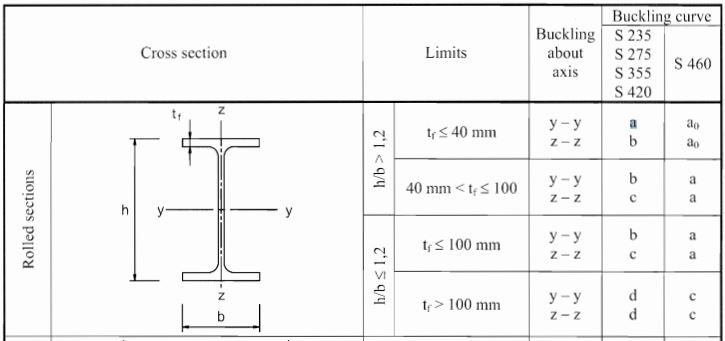

Fig.2 Assignment of buckling curves

In [149]:
def buckling_curve(curve) : 
    alpha=0.8 
    if curve == "A0":
        alpha=0.13
    if curve == "A":
        alpha=0.21
    if curve == "B":
        alpha=0.34
    if curve == "C":
        alpha=0.49
    if curve == "D":
        alpha=0.76
    return alpha

#### Slenderness for flexural buckling

In [150]:
lambda_y = Ly / iy
lambda_z = Lz / iz
lambda1 = 93.9 * math.sqrt(235/fy)
lambda_dash_y = lambda_y / lambda1
lambda_dash_z = lambda_z / lambda1

In [151]:
print("lambda_y                = ", ("%2.2f" % (lambda_y) ), "[-]")
print("lambda_z                = ", ("%2.2f" % (lambda_z) ), "[-]")
print("lambda1                = ", ("%2.2f" % (lambda1) ), "[-]")
print("lambda_dash_y           = ", ("%2.2f" % (lambda_dash_y) ), "[-]")
print("lambda_dash_z           = ", ("%2.2f" % (lambda_dash_z) ), "[-]")

lambda_y                =  24.53 [-]
lambda_z                =  232.82 [-]
lambda1                =  93.90 [-]
lambda_dash_y           =  0.26 [-]
lambda_dash_z           =  2.48 [-]


#### Imperfection factor

In [152]:
alpha_y = buckling_curve("A")
alpha_z = buckling_curve("B")

In [153]:
print("alpha_y                 = ", ("%2.2f" % (alpha_y) ), "[-]")
print("alpha_z                 = ", ("%2.2f" % (alpha_z) ), "[-]")

alpha_y                 =  0.21 [-]
alpha_z                 =  0.34 [-]


#### Buckling curves

In [154]:
PHI_y = 0.5*(1 + alpha_y *(lambda_dash_y - 0.2) + lambda_dash_y**2)
PHI_z = 0.5*(1 + alpha_z *(lambda_dash_z - 0.2) + lambda_dash_z**2)
chi_y = min(1 / (PHI_y + math.sqrt(PHI_y**2 - lambda_dash_y**2)),1)
chi_z = min(1 / (PHI_z + math.sqrt(PHI_z**2 - lambda_dash_z**2)),1)

In [155]:
print("PHI_y                   = ", ("%2.2f" % (PHI_y) ), "[-]")
print("PHI_z                   = ", ("%2.2f" % (PHI_z) ), "[-]")
print("chi_y                   = ", ("%2.2f" % (chi_y) ), "[-]")
print("chi_z                   = ", ("%2.2f" % (chi_z) ), "[-]")

PHI_y                   =  0.54 [-]
PHI_z                   =  3.96 [-]
chi_y                   =  0.99 [-]
chi_z                   =  0.14 [-]


#### Slenderness for torsional and torsional-flexural buckling

For members of open cross-sections the above flexural buckling may be less critical then torsional or torsional-flexural buckling. In such a case torsional and torsional-flexural buckling needs to be checked.

In [156]:
# Non-dimensional slenderness for torsional or torsional-flexural buckling
#lambda_dash_T = math.sqrt(A * fy / NcrT)

LET'S ASSUME THE ABOVE MODE (torsiona and torsional-flexural) IS NOT CRITICAL IN OUR CASE. LET'S CHECK LATERAL TORSIONAL BUCKLING MODE.

### Lateral torsional buckling (uniform member in bending) 

#### Lateral torsional buckling curves

Imperfection factor:

In [157]:
alpha_LT = buckling_curve("C")

In [158]:
print("alpha_LT                = ", ("%2.2f" % (alpha_LT) ), "[-]")

alpha_LT                =  0.49 [-]


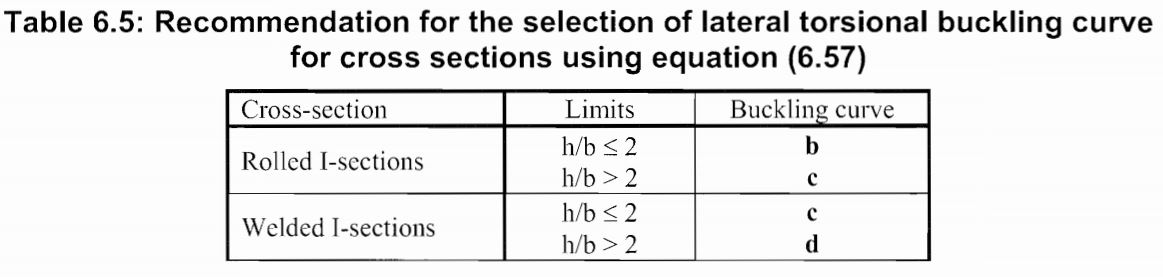

Fig.3 Assignment of buckling curves for lateral torsional buckling

#### Mcr, critical moment calculation

The critical moment Mcr is determined based on Annex NB.3 of EN 1993-1-1. This method can be used for the following profiles: 

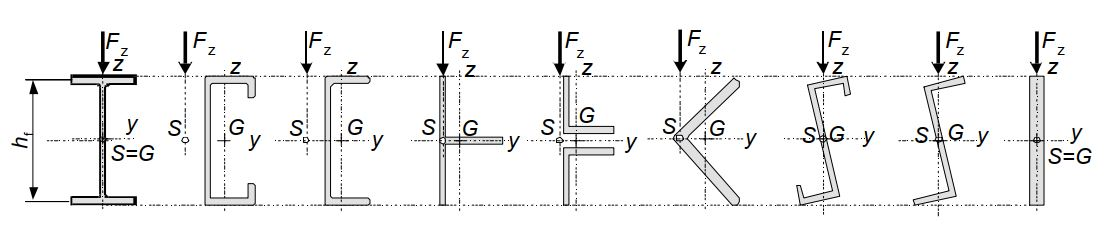

Fig.4 Cross sections suitable for the method

Coefficients ky, kz (accounting for boundary conditions in bending at supports) and kw (accounting for boundary conditions in torsion (warping)) equal to 0.5 for both ends clamped (or fixed), 1.0 for both ends pinned and 0.7 for one end clamped and the other end pinned.

Coefficient ky is related to the end rotation in plane normal to y-y axis, kz is related to the end rotation in plane normal to z-z axis. These coefficients are analogous to the Lcr/L ratio of compressed members. Coefficient kw is related to the deplanation of end section (warping). If warping is not restrained (special detailing) at the ends kw = 1.0.

(C)...for compressed flange, (T)...for flange in tension, (G)...gravity centre, (S)...shear centre

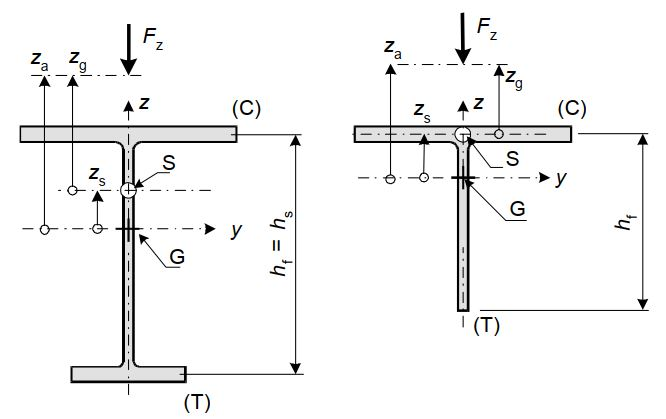

Fig.5 Cross sections definitions

#### Table NB.3.1 of CSN EN 1993-1-1

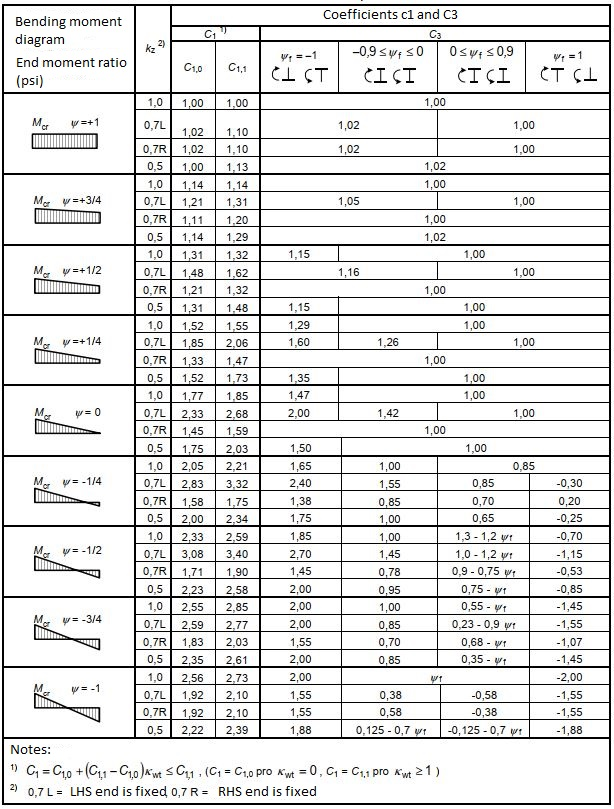

psi_f .... includes assymetry of the profile. 

\begin{equation*}
\psi_f = (I_{fc} - I_{ft}) / (I_{fc} + I_{ft})
\end{equation*}

Ifc .... second moment of inertia of compressed flange with respect to the main axis of the cross-section. 
Ift .... second moment of inertia of tension flange with respect to the main axis of the cross-section.
Therefore for symmetric profile psi_f = 0.

#### Table NB.3.2 of CSN EN 1993-1-1

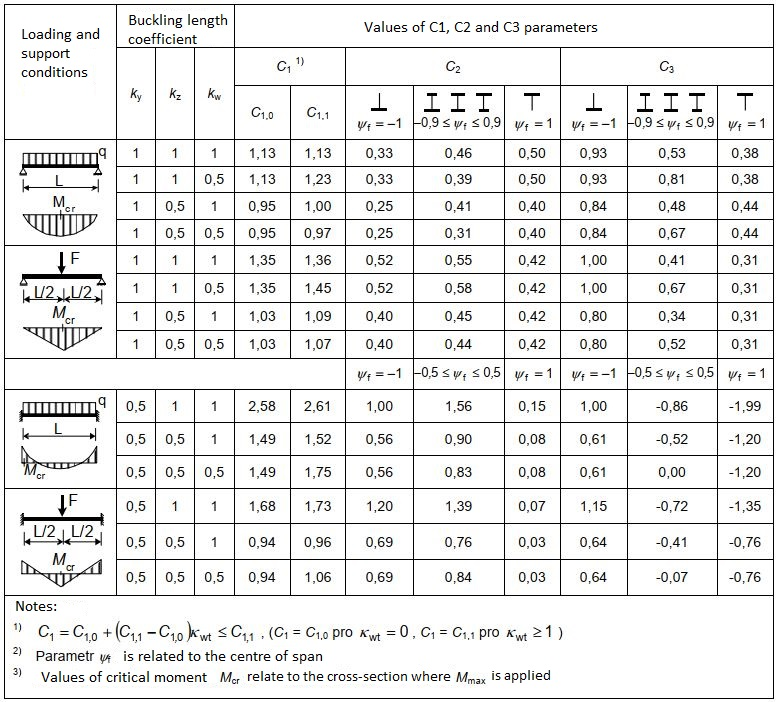

In [159]:
def Mcrit():
    kz = 1 # simple support for bending
    kw = 1 # warping not prevented
    kappa_wt = math.pi / kw / (1000 * L) * math.sqrt(E * Iw / G / It)
    zeta_g = math.pi * (1000 * zg) / kz / (1000 * L) * math.sqrt(E * Iz / G / It)
    zj = 0 # section is symmetric about the y axis, therefore zeta_j is also zero
    zeta_j = math.pi * (1000 * zj) / kz / (1000 * L) * math.sqrt(E * Iz / G / It)
    
    # C1...represents mainly the shape of bending moment diagram
    # C2...applies when loading is not applied trough the shear centre (transverse loading, not end moments)
    # C3...applies to cross-section not symmetrical about y-axis
    
    # the following set is for NB.3.2
    # IGNORE
    #C10 = 1.35
    #C11 = 1.36
    #C1 = C10 + (C11 - C10) * kappa_wt
    #C2 = 0.55
    #C3 = 0.41

    # the following set is for NB.3.1
    C10 = 1.77
    C11 = 1.85
    C1 = C10 + (C11 - C10) * kappa_wt
    C2 = 0
    C3 = 1
    
    # Dimensionless critical moment
    mu_cr = C1 / kz * (math.sqrt(1 + kappa_wt**2 + (C2 * zeta_g - C3 * zeta_j)**2) - (C2 * zeta_g - C3 * zeta_j))
    M_cr = (mu_cr * math.pi * math.sqrt(E * Iz * G * It) / L)
    
    print("kappa_wt                  = ", ("%2.3f" % kappa_wt), " [-]")
    print("zeta_g                    = ", ("%2.3f" % zeta_g), " [-]")
    print("zeta_j                    = ", ("%2.3f" % zeta_j), " [-]")
    print("C1                        = ", ("%2.3f" % C1), " [-]")
    print("mu_cr                     = ", ("%2.3f" % mu_cr), " [-]")
    print("M_cr                      = ", ("%2.3f" % M_cr), " [Nmm]")
    
    return M_cr

In [160]:
beta = 0.75
lambda_LT_0 = 0.4
M_cr = Mcrit()

kappa_wt                  =  0.001  [-]
zeta_g                    =  0.000  [-]
zeta_j                    =  0.000  [-]
C1                        =  1.770  [-]
mu_cr                     =  1.770  [-]
M_cr                      =  631237196.387  [Nmm]


In [161]:
lambda_dash_LT = math.sqrt(Wy * fy / M_cr)
PHI_LT = 0.5*(1 + alpha_LT *(lambda_dash_LT - lambda_LT_0) + beta * lambda_dash_LT**2)
chi_LT = min(1 / (PHI_LT + math.sqrt(PHI_LT**2 - beta * lambda_dash_LT**2)),1, 1 / lambda_dash_LT**2)

In [162]:
print("M_cr                      = ", ("%2.3f" % (M_cr/1000000)), " [kNm]")
print("lambda_dash_LT            = ", ("%2.3f" % lambda_dash_LT), " [-]")
print("PHI_LT                    = ", ("%2.3f" % PHI_LT), " [-]")
print("chi_LT                    = ", ("%2.3f" % chi_LT), " [-]")

M_cr                      =  631.237  [kNm]
lambda_dash_LT            =  0.848  [-]
PHI_LT                    =  0.879  [-]
chi_LT                    =  0.734  [-]


Below is a procedure for calculation of critical bending moment based on the above method. Table NB.3.1 is used (NB.3.2 is shown for demonstration only). Hardcoded figures from the table are shown below. Explanation of C coefficients is shown below.

### Interaction of axial compression and bending

In line with [3] the interaction coefficients for column will be assumed as:

In [163]:
kyy = 1.0
kzy = 1.0
kyz = 1.5
kzz = 1.5

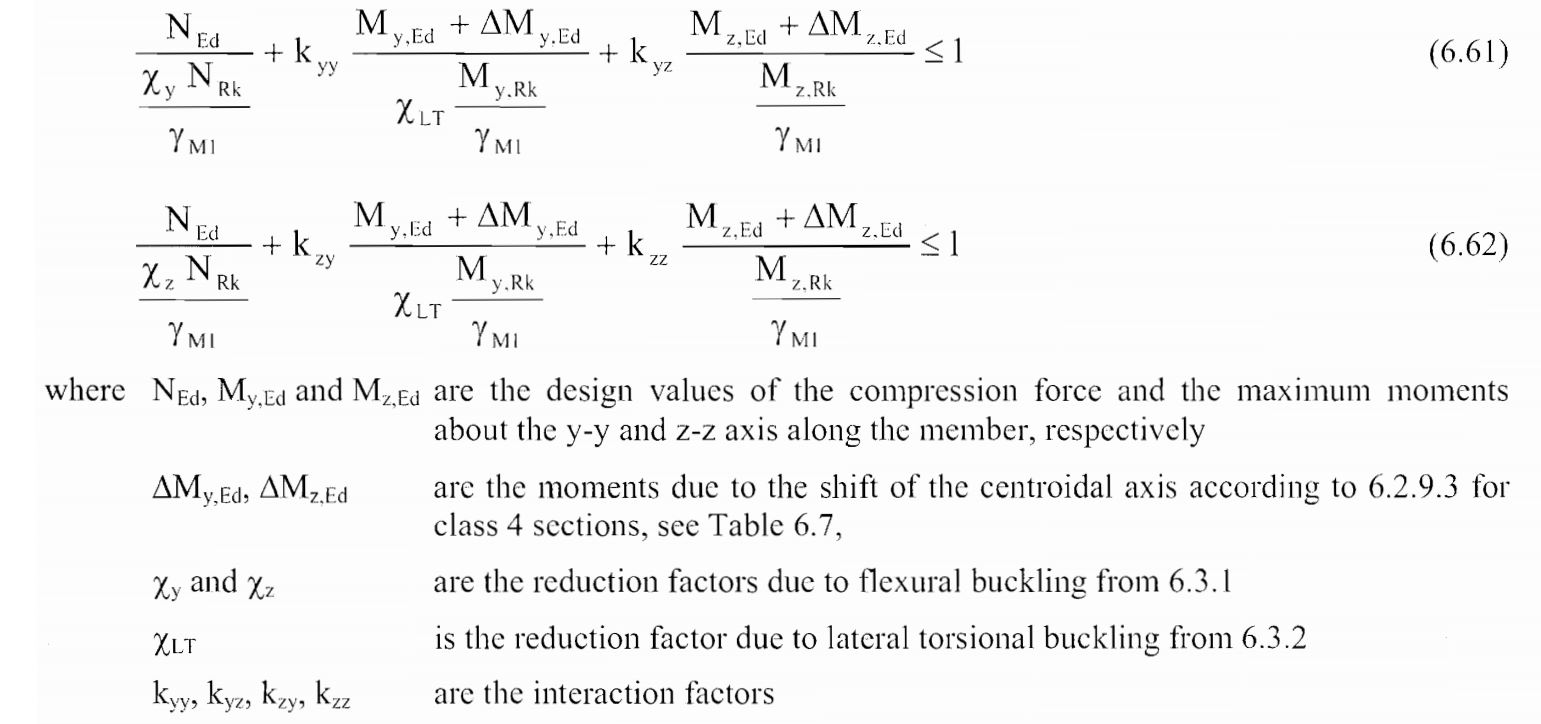

In [164]:
N_Rk = A * fy
My_Rk = Wy * fy
Mz_Rk = Wz * fy
My_Ed = H_Sd * L
Mz_Ed = 0
DeltaMy_Ed = 0
DeltaMz_Ed = 0
UF1 = N_Sd / (chi_y * N_Rk / gamma_M1 ) + kyy * (My_Ed + DeltaMy_Ed) / (chi_LT * My_Rk/gamma_M1) + kyz * (Mz_Ed + DeltaMz_Ed)/(Mz_Rk/gamma_M1)
UF2 = N_Sd / (chi_z * N_Rk / gamma_M1 ) + kzy * (My_Ed + DeltaMy_Ed) / (chi_LT * My_Rk/gamma_M1) + kzz * (Mz_Ed + DeltaMz_Ed)/(Mz_Rk/gamma_M1)

In [165]:
print("N_Sd                      = ", ("%2.3f" % (N_Sd/1000)  ), " [kN]")
print("My_Ed                     = ", ("%2.3f" % (My_Ed /1000)  ), " [kNm]")
print("Mz_Ed                     = ", ("%2.3f" % (Mz_Ed /1000)  ), " [kNm]")

print("N_Rk                      = ", ("%2.3f" % (N_Rk/1000)  ), " [kN]")
print("My_Rk                     = ", ("%2.3f" % (My_Rk/1000000)  ), " [kNm]")
print("Mz_Rk                     = ", ("%2.3f" % (Mz_Rk/1000000)  ), " [kNm]")
print("My_Ed                     = ", ("%2.3f" % (My_Ed/1000000)  ), " [kNm]")
print("Mz_Ed                     = ", ("%2.3f" % (Mz_Ed/1000000)  ), " [kNm]")

print("UF1                       = ", ("%2.3f" % UF1), " [-]")
print("UF2                       = ", ("%2.3f" % UF2), " [-]")

N_Sd                      =  405.000  [kN]
My_Ed                     =  0.000  [kNm]
Mz_Ed                     =  0.000  [kNm]
N_Rk                      =  2726.000  [kN]
My_Rk                     =  453.550  [kNm]
Mz_Rk                     =  50.290  [kNm]
My_Ed                     =  0.000  [kNm]
Mz_Ed                     =  0.000  [kNm]
UF1                       =  0.151  [-]
UF2                       =  1.048  [-]


### References

[1] Appendix NB, CSN EN 1993-1-3, Eurocode 3, Czech version

[2] EN 1993-1-3 (2005), Eurocode 3, : Design of steel structures - Part 1-1: General rules and rules for buildings

[3] Access Steel, NCCI: Verification of columns in simple construction - a simplified interaction criterion, SN048b.pdf